In [16]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np

## The goal

Fitting a line that best approximate a set of points in 2 dimensions.

## The dataset

We are going to use the _scatter.pickle_ dataset in the datasets folder. Make sure to use Python 3 to load this one, as I used a pickling protocol specific to Python 3.

In [18]:
with open('../datasets/scatter.pickle', 'rb') as f:
    data = pickle.load(f)
    x_vals = [x for x in data[0]]
    y_vals = [x for x in data[1]]

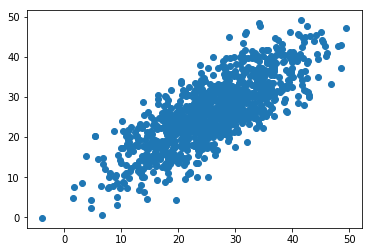

In [20]:
plt.scatter(x_vals, y_vals)
plt.show()

In [21]:
len(X)

1000

## Defining the computational graph

The way we work in Tensorflow is by first defining the variables and placeholders in our computational graph, and then specifying the way they interact with each other (for example, this node is added with this one, this one goes through a relu, etc).

### Variables and placeholders

Our simple linear regression model is going to be y = ax+b. So we need to define one placeholder node for each of x and y, and one variable node for each of a and b. The `init` object is used later to initialize all global variables at once, before the training starts. In our case, variables a and b will be initialized by sampling them from a normal distribution.

TODO: Better explain the shape parameter

In [22]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
a = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
init = tf.global_variables_initializer()

## Shape of the computational graph

Here we define how each node interacts with each other. Following our y = ax+b formula, we get:

In [23]:
model_output = tf.add(tf.matmul(x_data, a), b)

## Optimization setup

### Loss function

We use the mean squared error as our loss function, so we take the difference between the predicted and true values (`y_model - model_output`). This is a vectorized operation, and we obtain a vector of differences, which we reduce to a single mean using `tf.reduce_mean`.


### Gradient descent parameters

We set need a learning rate and batch size to do batch gradient descent. We then instanciate an optimizer, and call `train_step` the action of minimizing loss using that optimizer.

In [39]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
learning_rate = 0.0001
batch_size = 25
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

## Training

We start by creating a session and initializing the variables in the computational graph.

In [40]:
sess = tf.Session()
sess.run(init)

Here we do 100 iterations of randomly sampling `batch_size` points in our dataset and making one gradient descent step to minimize mean squared loss over that batch. 

TODO: explain why we transpose

We tell the `Session` to run the `train_step`, which is the gradient descent optimization step.

We also keep track of our loss at every 10th iteration so we can graph it later. Note that the loss is computed over the batch of samples, and not the whole dataset.

In [41]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([[x_vals[i] for i in rand_index]])
    rand_y = np.transpose([[y_vals[i] for i in rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%10 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(a)) 
              + 'b = ' + str(sess.run(b)))
    print('Loss = ''' + str(temp_loss))

Loss = 4944.82
Loss = 3232.91
Loss = 2817.39
Loss = 1892.6
Loss = 1421.89
Loss = 953.763
Loss = 906.742
Loss = 555.379
Loss = 499.047
Step #10 A = [[ 0.31423771]]b = [[ 0.62987089]]
Loss = 279.137
Loss = 275.247
Loss = 210.415
Loss = 118.591
Loss = 105.535
Loss = 90.2751
Loss = 87.9818
Loss = 54.0294
Loss = 59.5332
Loss = 30.6121
Step #20 A = [[ 0.83840609]]b = [[ 0.64820832]]
Loss = 18.3051
Loss = 26.7944
Loss = 35.1726
Loss = 39.2374
Loss = 37.8875
Loss = 34.9712
Loss = 36.5606
Loss = 21.0636
Loss = 20.7871
Loss = 34.2786
Step #30 A = [[ 0.95374489]]b = [[ 0.65333855]]
Loss = 19.9212
Loss = 20.0837
Loss = 25.3316
Loss = 37.051
Loss = 21.206
Loss = 33.3397
Loss = 41.446
Loss = 25.4135
Loss = 27.0875
Loss = 22.2108
Step #40 A = [[ 0.96602225]]b = [[ 0.65441167]]
Loss = 31.248
Loss = 21.1974
Loss = 20.7192
Loss = 27.4088
Loss = 20.461
Loss = 43.2195
Loss = 30.0319
Loss = 22.9107
Loss = 36.78
Loss = 22.4427
Step #50 A = [[ 0.97726327]]b = [[ 0.65555334]]
Loss = 18.8058
Loss = 25.3944
Los

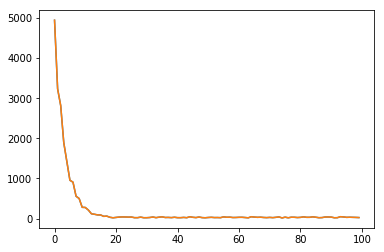

In [44]:
plt.plot(loss_vec)
plt.show()